# RF Project for Assessing Loan Risk
By Matthew Zhang




Our Research Paper will have the following sections:

* Overview of the project
* Exploratory Data Analysis
* Methods
* Conclusion
    + Result
    + Discussion

## Overview

In this project we will build a Logistic model and a Random Forest (RF) model to predict whether a customer will default on a loan (i.e., to identify the loans in the "bad" category of the `good.bad` variable).  We will use the dataset `good_bad_loans.csv`.  This dataset has 1,303,286, rows and 18 columns.  Please see `variable definitions.pdf` for the definitions of the variables in the dataset.

## Exploratory Data Analysis


In [ ]:
#install necessary libraries for Jupyter
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [ ]:
# import relevant libraries and methods for our models.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, truncnorm, randint
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression # for building logistic models
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# read in our dataset to df
df = pd.read_csv("/Users/matthewzhang/Coding/good_bad_loans.csv")

In [ ]:
# inspect first few rows of dataset
print(round(df.head(), 4))

   funded_amnt       term  int_rate  installment grade emp_length  \
0        30000  36 months     22.35      1151.16     D    5 years   
1        40000  60 months     16.14       975.71     C   < 1 year   
2        20000  36 months      7.56       622.68     A  10+ years   
3         4500  36 months     11.31       147.99     B  10+ years   
4         8425  36 months     27.27       345.18     E    3 years   

  home_ownership  annual_inc             purpose addr_state    dti  \
0       MORTGAGE    100000.0  debt_consolidation         CA  30.46   
1       MORTGAGE     45000.0         credit_card         OH  50.53   
2       MORTGAGE    100000.0         credit_card         WA  18.92   
3           RENT     38500.0         credit_card         TX   4.64   
4       MORTGAGE    450000.0         credit_card         MA  12.37   

   delinq_2yrs  inq_last_6mths application_type  acc_now_delinq  delinq_amnt  \
0            0               0        Joint App               0            0   
1   

### We will first perform a sanity check on the data and see if there are any potential problems with the data.




In [ ]:
#inspect column names and compare to variable definitions
df.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'application_type', 'acc_now_delinq',
       'delinq_amnt', 'tax_liens', 'good_bad'],
      dtype='object')

In [ ]:
#check for missing data (null)
print(df.isna().sum())

funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
emp_length          75159
home_ownership          0
annual_inc              0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
application_type        0
acc_now_delinq          0
delinq_amnt             0
tax_liens               0
good_bad                0
dtype: int64


In [ ]:
#investigate column names, non-null counts, and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303286 entries, 0 to 1303285
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   funded_amnt       1303286 non-null  int64  
 1   term              1303286 non-null  object 
 2   int_rate          1303286 non-null  float64
 3   installment       1303286 non-null  float64
 4   grade             1303286 non-null  object 
 5   emp_length        1228127 non-null  object 
 6   home_ownership    1303286 non-null  object 
 7   annual_inc        1303286 non-null  float64
 8   purpose           1303286 non-null  object 
 9   addr_state        1303286 non-null  object 
 10  dti               1303286 non-null  float64
 11  delinq_2yrs       1303286 non-null  int64  
 12  inq_last_6mths    1303286 non-null  int64  
 13  application_type  1303286 non-null  object 
 14  acc_now_delinq    1303286 non-null  int64  
 15  delinq_amnt       1303286 non-null  int64  
 16  

In [ ]:
round(df.describe(),4)

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,acc_now_delinq,delinq_amnt,tax_liens
count,1.303286e+06,1.303286e+06,1.303286e+06,1.303286e+06,1.303286e+06,1.303286e+06,1.303286e+06,1.303286e+06,1.303286e+06,1.303286e+06
mean,1.440778e+04,1.325700e+01,4.380794e+02,7.617649e+04,1.825910e+01,3.176000e-01,6.592000e-01,5.100000e-03,1.505970e+01,5.200000e-02
std,8.694898e+03,4.760300e+00,2.610523e+02,7.004696e+04,1.093840e+01,8.773000e-01,9.412000e-01,7.740000e-02,8.177296e+02,3.988000e-01
min,5.000000e+02,5.310000e+00,4.930000e+00,1.600000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.750000e+00,2.488200e+02,4.594425e+04,1.179000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+04,1.599000e+01,5.804500e+02,9.000000e+04,2.404000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,3.900000e+01,8.000000e+00,1.400000e+01,2.499250e+05,8.500000e+01


In [ ]:
#determine counts of good and bad loans, and also their proportion
print(df['good_bad'].value_counts())
print(round(df['good_bad'].value_counts(normalize=True), 4))

good_bad
good    1041663
bad      261623
Name: count, dtype: int64
good_bad
good    0.7993
bad     0.2007
Name: proportion, dtype: float64


##### Analysis

There are several null values for the data in the column, 'emp_length' (75159 to be exact). This is a clear problem with the data, as it will likely impact our model training since missing values will not be useful for predictive power.

Furthermore, there is a high proportion of data for good loans compared to bad loans, which could be a problem later on when splitting data. To be exact, about 80% of the data is 'good', while about 20% of the data is 'bad'. Optimally, we would have equal proportions of good and bad loans in training versus testing data to have an accurately trained model that can test on untrained data.

### Next, we will determine how many observations the dataset `good_bad_loans.csv` has.

In [ ]:
#check shape of the dataframe
print(df.shape)

(1303286, 18)


There are 1303286 observations in the dataset, with 18 variables for each observation. This means there are 1303286 rows and 18 columns.

### Now, we will determine what percentage of the data is missing for each variable in the dataset. If there is missing data in a variable, we will state what percent is missing for the good and bad categories.

In [ ]:
# From EDA, we know the only variable with null values is 'emp_length'

# Overall missing data for each variable as percentages
overall_missing = df['emp_length'].isna().sum() / len(df) * 100

# Percentage of missing data within 'good' and 'bad' categories of the target variables
missing_in_good = df[df['good_bad'] == 'good']['emp_length'].isna().sum() / df['good_bad'].value_counts(dropna=True)['good'] * 100
missing_in_bad = df[df['good_bad'] == 'bad']['emp_length'].isna().sum() / df['good_bad'].value_counts(dropna=True)['bad'] * 100

overall_missing_good = df[df["good_bad"] == "good"]['emp_length'].isna().sum() / len(df['emp_length']) * 100
overall_missing_bad =  df[df["good_bad"] == "bad"]['emp_length'].isna().sum() / len(df['emp_length']) * 100

print("Overall missing data (%): \n", round(overall_missing, 4),
      "\nPercent of overall missing data that is also good: \n", round(overall_missing_good, 4),
      "\nPercent of overall missing data that is also bad: \n", round(overall_missing_bad, 4),
      "\nPercent missing data within good categories of variables: \n", round(missing_in_good,4),
      "\nPercent missing data within bad categories of variables: \n", round(missing_in_bad, 4))


Overall missing data (%): 
 5.7669 
Percent of overall missing data that is also good: 
 4.2064 
Percent of overall missing data that is also bad: 
 1.5604 
Percent missing data within good categories of variables: 
 5.2629 
Percent missing data within bad categories of variables: 
 7.7734


In the code output above, we can see:
* Proportion of overall missing data
* Proportion of all the missing data that is good or bad
* Proportion of good or bad data that is missing.

### Next, we will calculate the ratio of the bad:good class sizes in the dataset. From this number, we will determine if the dataset is balanced in terms of the number of good-bad accounts in the dataset.


In [ ]:
# calculate the count of good and bad data and determine the proportion
bad_count = (df['good_bad'] == 'bad').sum()
good_count = (df['good_bad'] == 'good').sum()
ratio = round(bad_count/good_count,4)
print("bad:good = ", ratio)

bad:good =  0.2512


Since the ratio of bad:good is 0.2512:1, the dataset is not balanced in terms of the numbers of good-bad accounts in the dataset. This is not favorable for model training, as there are about four times as many good accounts compared to bad accounts based on this ratio.

### Below, for the categorical variables, we will make plots to accomplish the following tasks and then note the interesting patterns that appear. We will also explain how these plots will help in the next model-building stage.

#### Here, we will compare class counts across different categories in each of the variables

Index(['term', 'grade', 'emp_length', 'home_ownership', 'purpose',
       'addr_state', 'application_type', 'good_bad'],
      dtype='object')


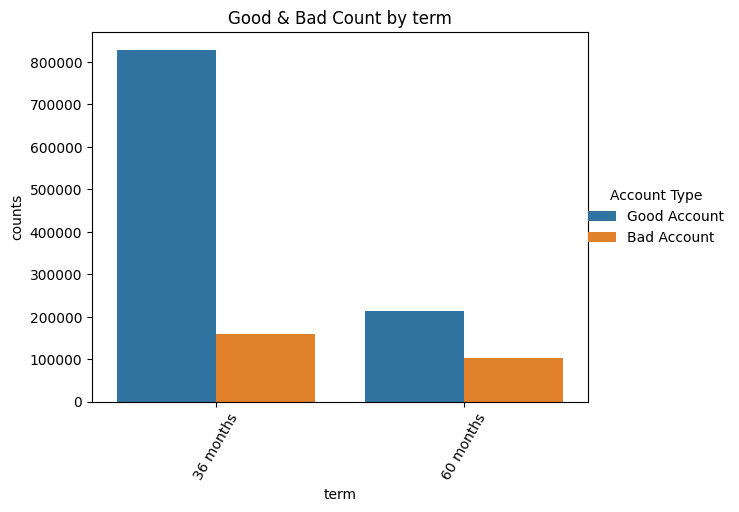

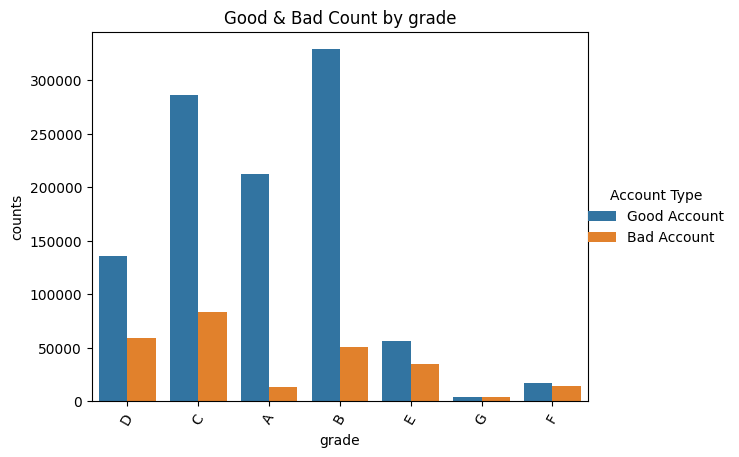

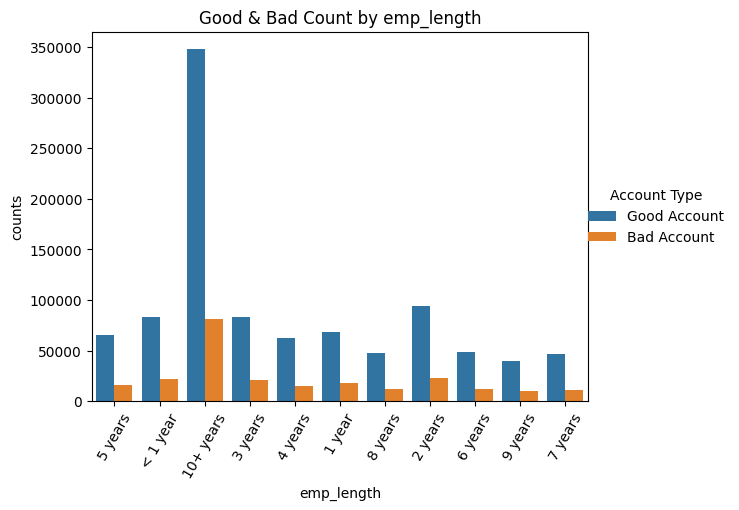

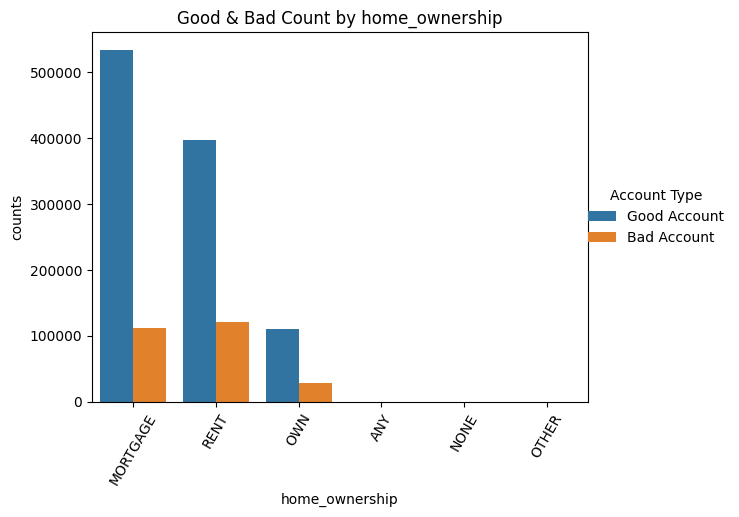

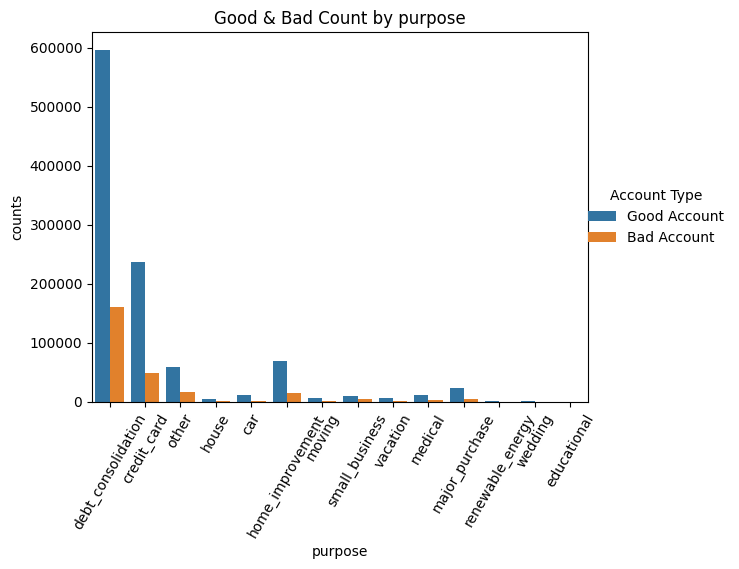

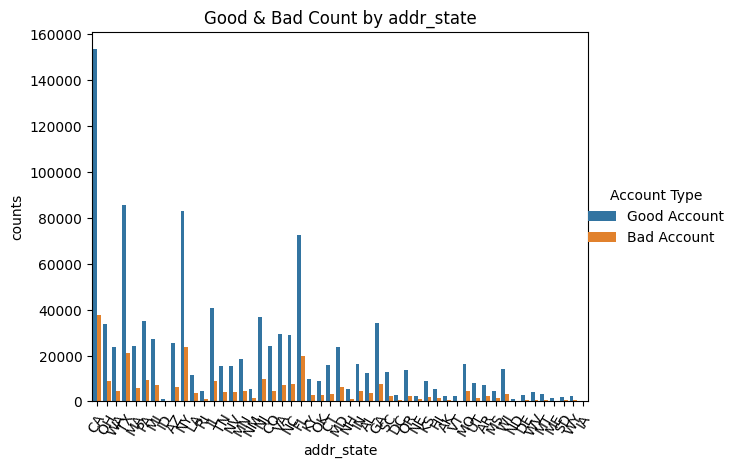

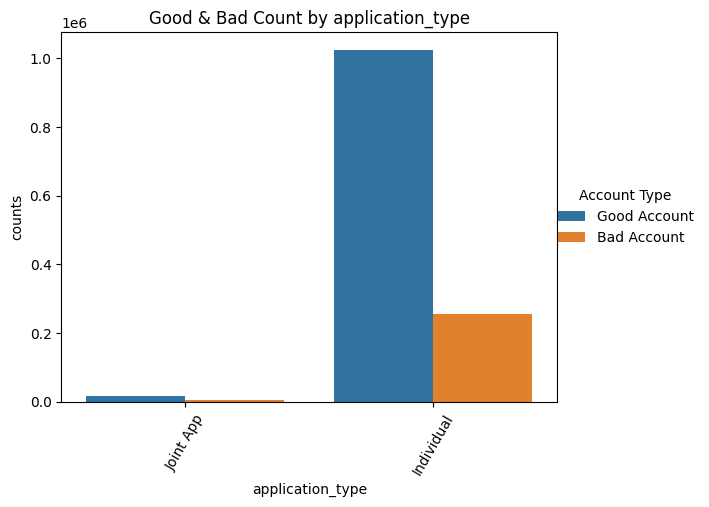

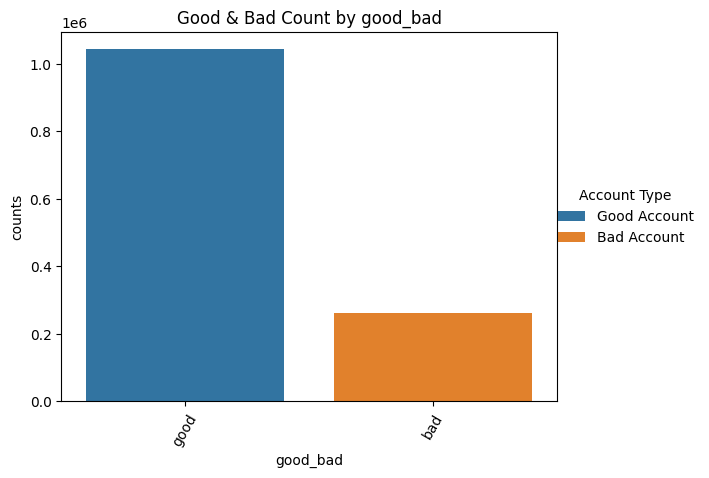

In [ ]:
#extract the categorical column names
cat_col_names = df.select_dtypes(include=object).columns
print(cat_col_names)

#for each categorical column, create a countplot
for col in cat_col_names:
    g = sns.countplot(df, x = col, hue = 'good_bad')
    # add title
    g.set(title = "Good & Bad Count by " + col, ylabel = 'counts')
    #create legend
    plt.legend(title='Account Type',  loc='center right',
               labels=['Good Account', 'Bad Account'],
               framealpha=0, bbox_to_anchor=(1.3, 0.5))
    plt.xticks(rotation=60)
    plt.show() # display the figure

#### Here, we will compare class proportions across different categories in each of the variables (see Precept 5)

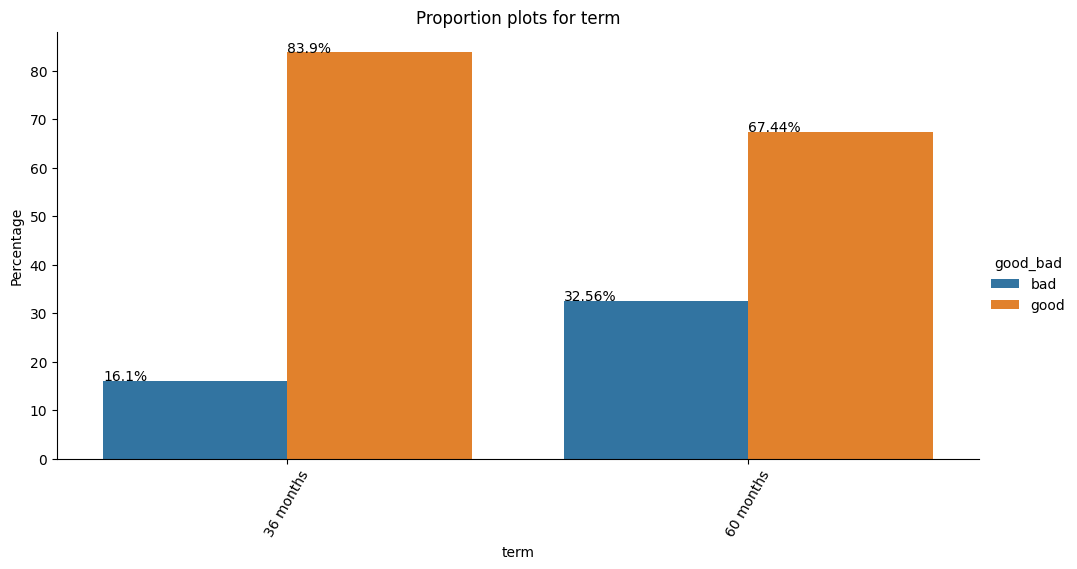

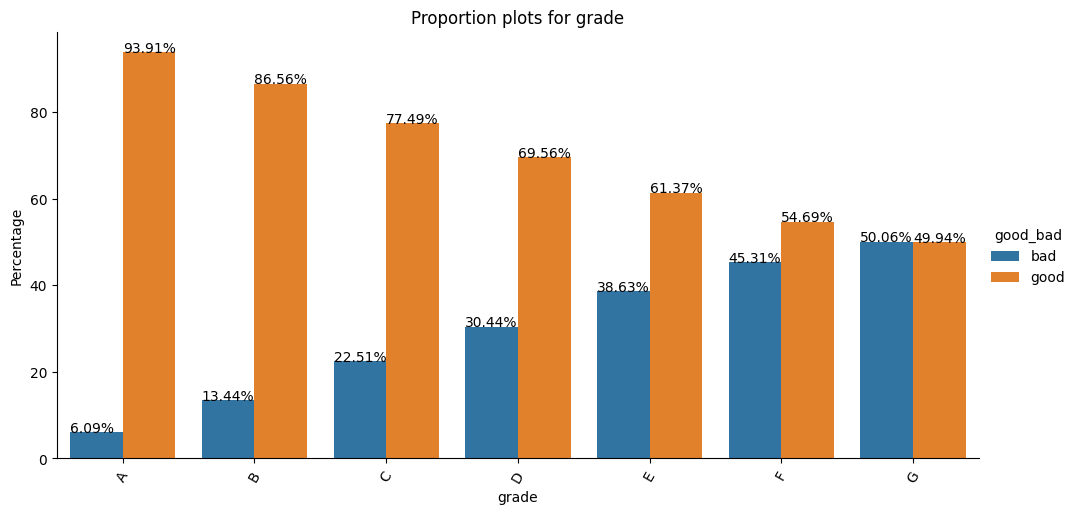

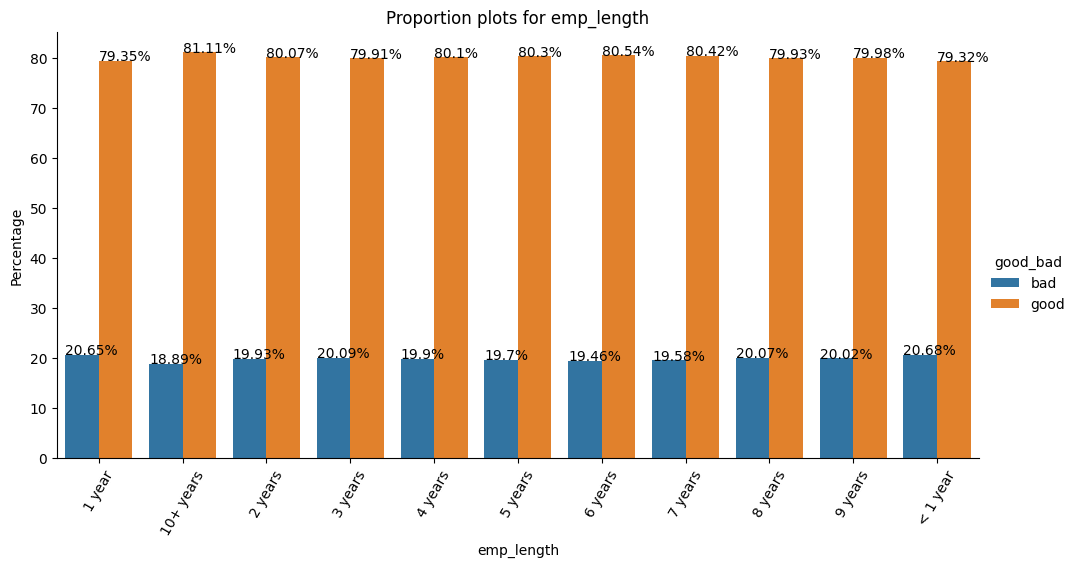

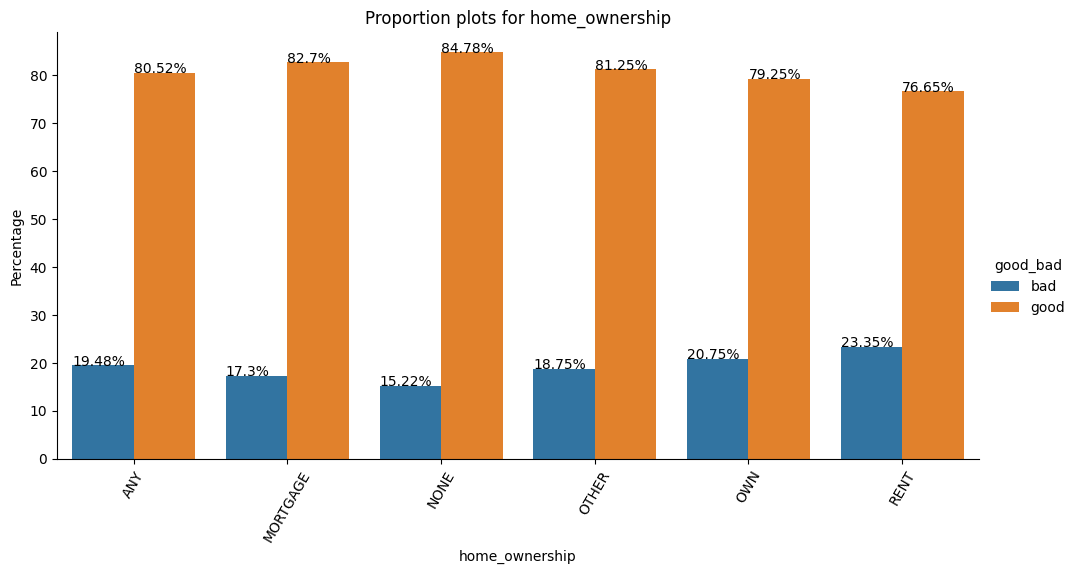

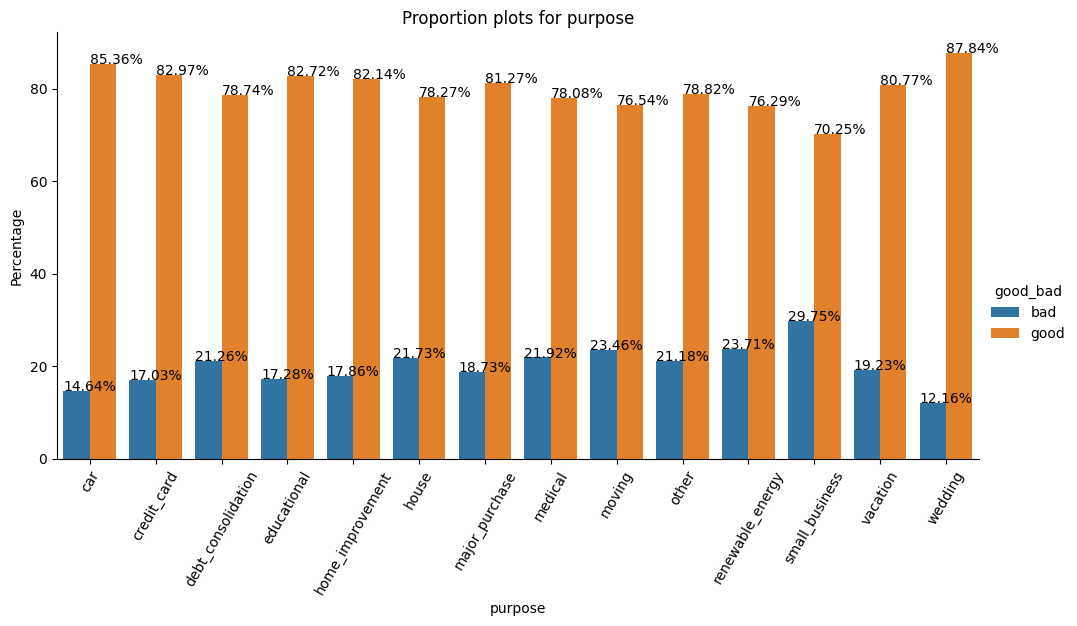

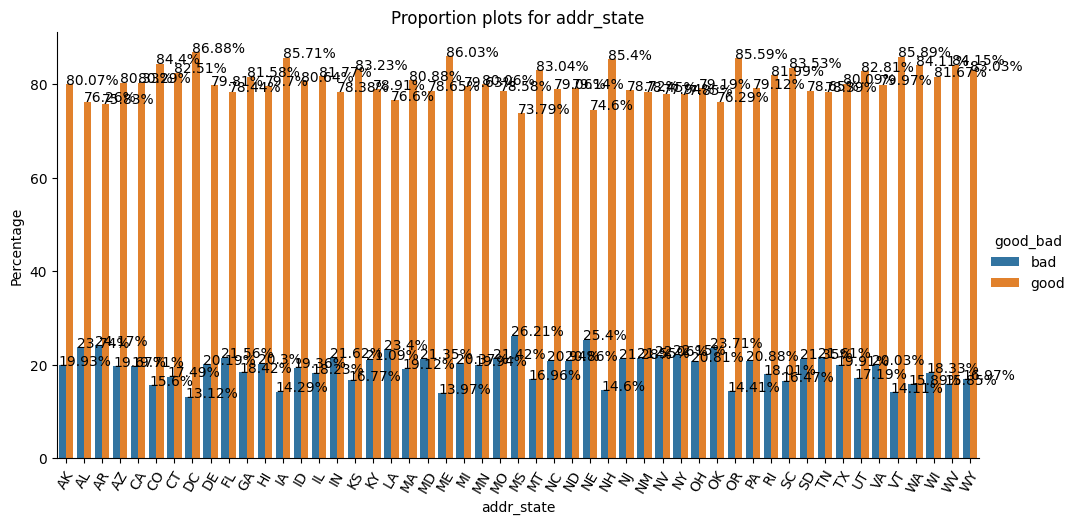

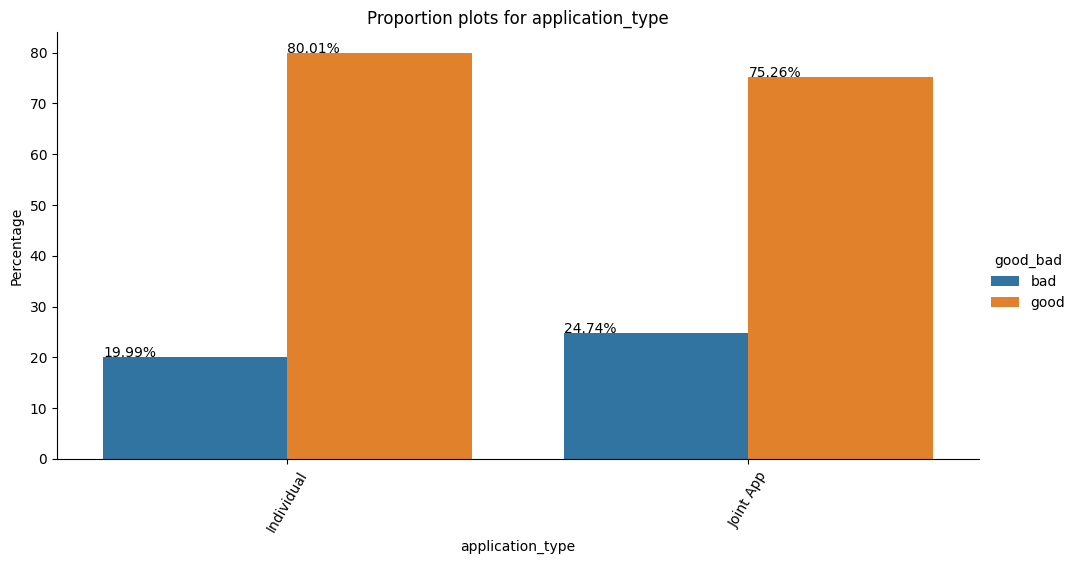

In [ ]:
#for each categorical column, we will plot their proportions of good and bad loans
for col in cat_col_names[:-1]:
    prop = df.groupby(col)['good_bad'].value_counts(normalize=True)

    # convert proportion to percent
    perct = prop*100

    # reset index
    perct_df = perct.reset_index(name = 'percent')

    # sort the values in the two columns
    perct_df_sorted = perct_df.sort_values([col, 'good_bad'])

    g = sns.catplot(x=col,y='percent',hue='good_bad',kind='bar',
        data=perct_df_sorted, height=5, aspect=2)
    g
    for p in g.ax.patches[0:(len(g.ax.patches)-2)]:
        txt = str(round(p.get_height(), 2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
    g.set(title = 'Proportion plots for ' + col, ylabel = 'Percentage')
    plt.xticks(rotation=60)
    plt.show()

The interesting patterns are:
* 60-month loans have a higher percentage of bad accounts
* A loans have a higher good percentage than G loans (grades A through G follow a pattern from least risky to most risky)
* emp_length has no statistically significant pattern
* No homeownership loans are less risky than loans with rental home ownership.
* The riskiest purpose is a small business, while the least busy purpose is a wedding.
* States are seemingly random.
* Individual applications are less risky than joint applications.

This will help in the model-building stage as it can estimate how important each feature is to the target variable, 'good_bad'. From these charts, we can intuitively check our coefficients and importance values after model training.

### For the numeric variables, we will make plots to compare the distribution of the variable between the two classes: bad and good. We will note any interesting patterns and explain why we would want to make the plots.

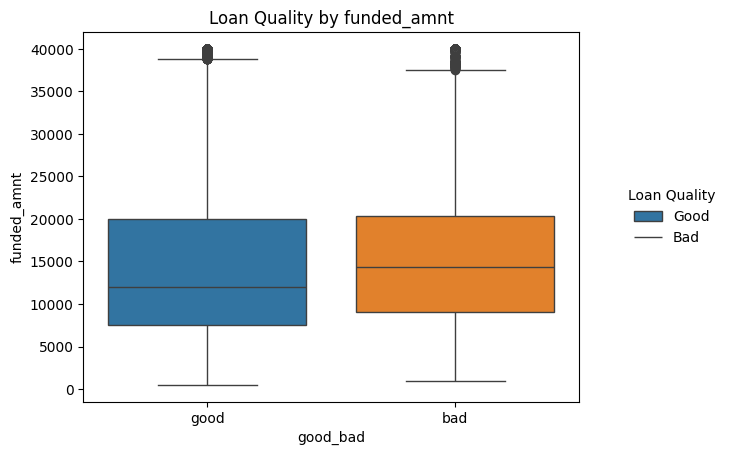

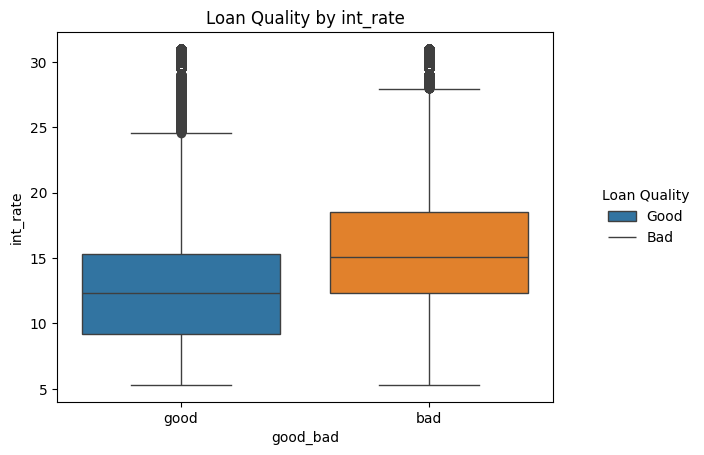

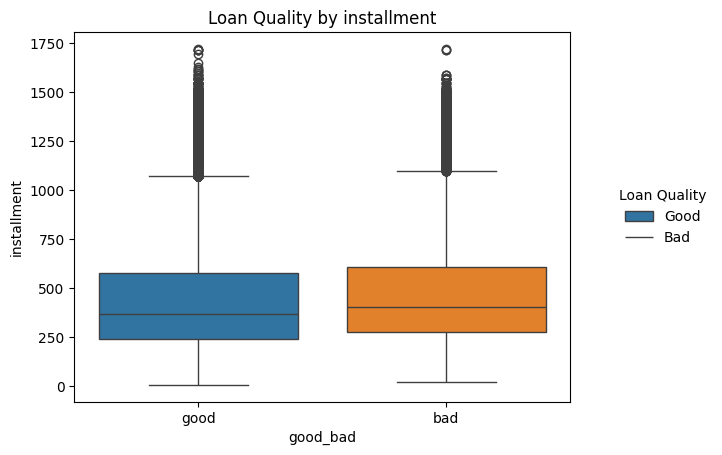

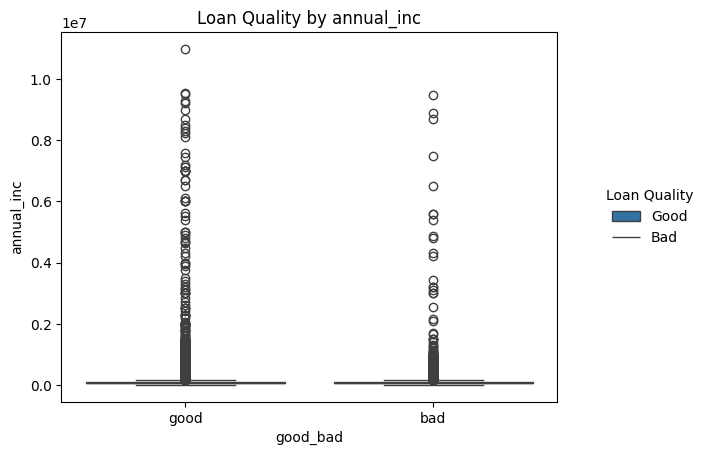

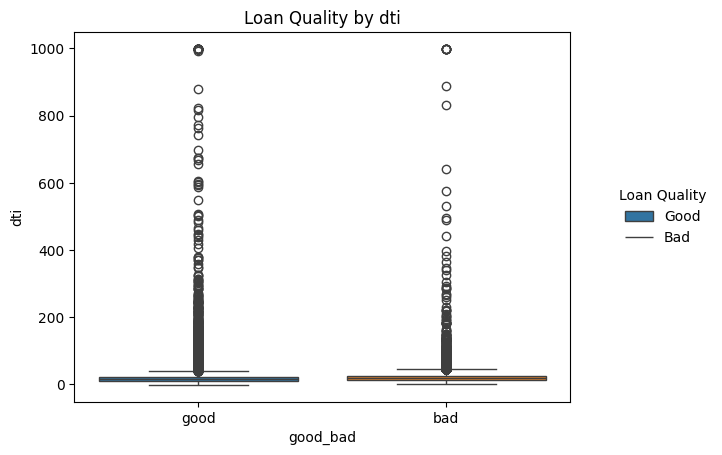

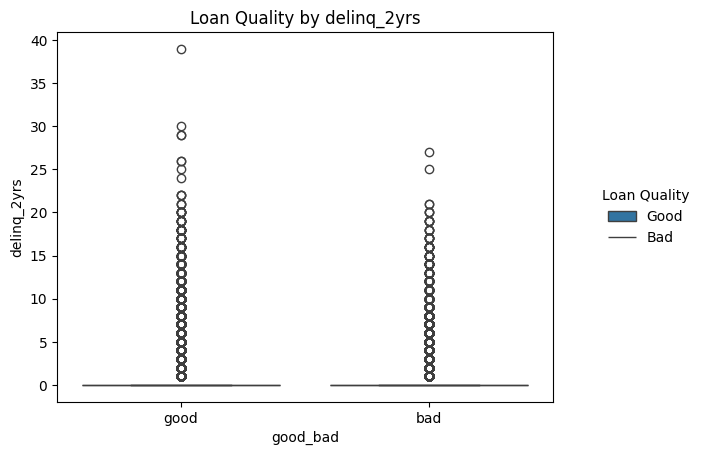

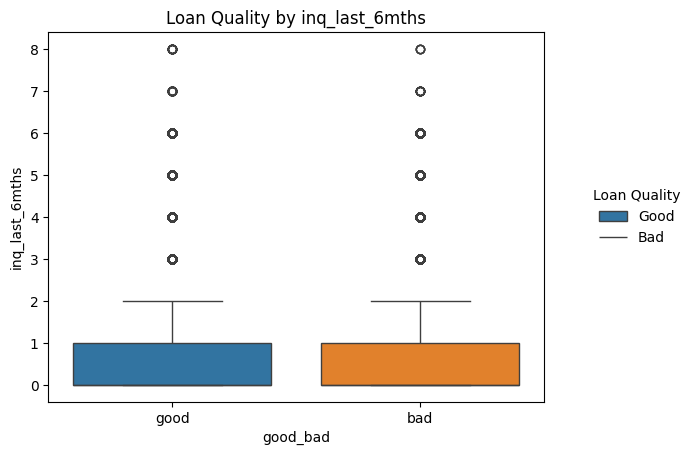

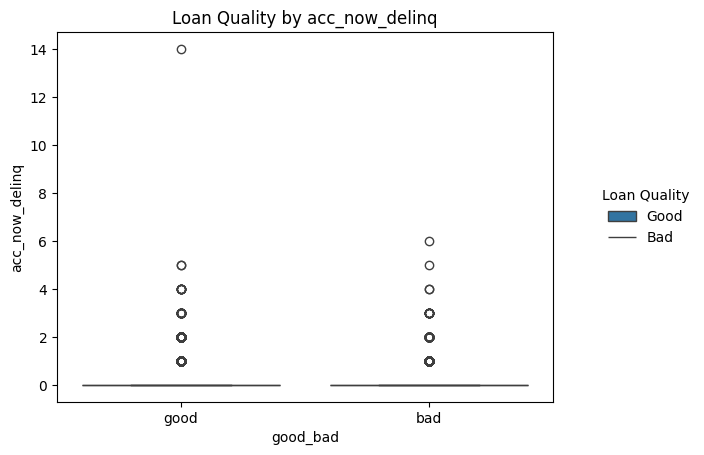

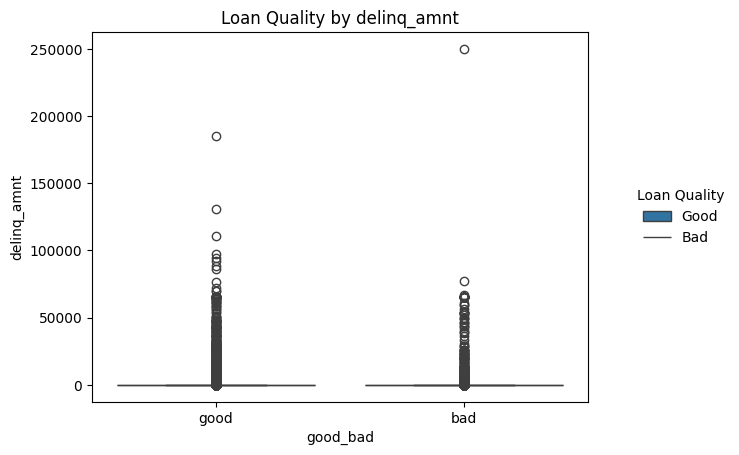

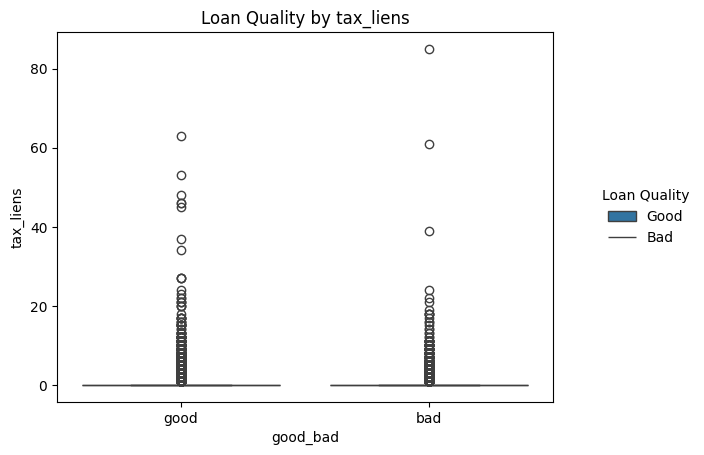

In [ ]:
cont_col_names = df.select_dtypes(include='number').columns
#plot the boxes for all the numeric variables, except for the target
for col in cont_col_names:
    g = sns.boxplot(df, y = col, x = df['good_bad'], hue = 'good_bad')
    #add titles
    g.set(title = "Loan Quality by " + col, ylabel = col)
    #add legend
    plt.legend(title='Loan Quality',  loc='center right',
        labels=['Good', 'Bad'],
        framealpha=0, bbox_to_anchor=(1.3, 0.5))
    plt.show() # display the figure


Here are some interesting patterns:
* Higher interest rates correlate to bad loans.
* Every other continuous variable does not seem to have a significant impact on the quality of the loan.

We want to make these plots to see what continuous variables are relevant to predicting if a loan is good or bad. Furthermore, these plots will be useful in coming up with a general estimate of their importance values and coefficients after training the model.

### After examining the plots, we will determine the top continuous variable and the top two categorical variables that have a strong influence on the values of the good_bad variable.

* The top continuous variable with a strong influence on the values of the good_bad variable is int_rate.
* The top two categorical variables that have strong influence on the values of the good_bad variable are term and grade.

## Methods

* We want to have a balanced dataset to successfully analyze the data. Since we do not know why some rows have missing values for `emp_length`, we are going to place all observations with missing values for `emp_length` under the same category called 'NA'.

In [ ]:
#change all the null values to 'NA'
df['emp_length'] = np.where(df['emp_length'].isna(), 'NA', df['emp_length'])
df['emp_length'].value_counts()

emp_length
10+ years    428547
2 years      117821
< 1 year     104529
3 years      104201
1 year        85671
5 years       81622
4 years       78029
NA            75159
6 years       60933
8 years       59125
7 years       58146
9 years       49503
Name: count, dtype: int64

Our dataset has several predictors for the model. To account for this, we can check the following:
* For each of the variables, `emp_length`, `purpose` and `state`, we will calculate the percentage of the "bad" accounts in each of the categories of the variable and display the categories along with the percentages in increasing order of the percentages.
* We should also plot these categories with the corresponding percentages in increasing order to better visualize our desired variables.

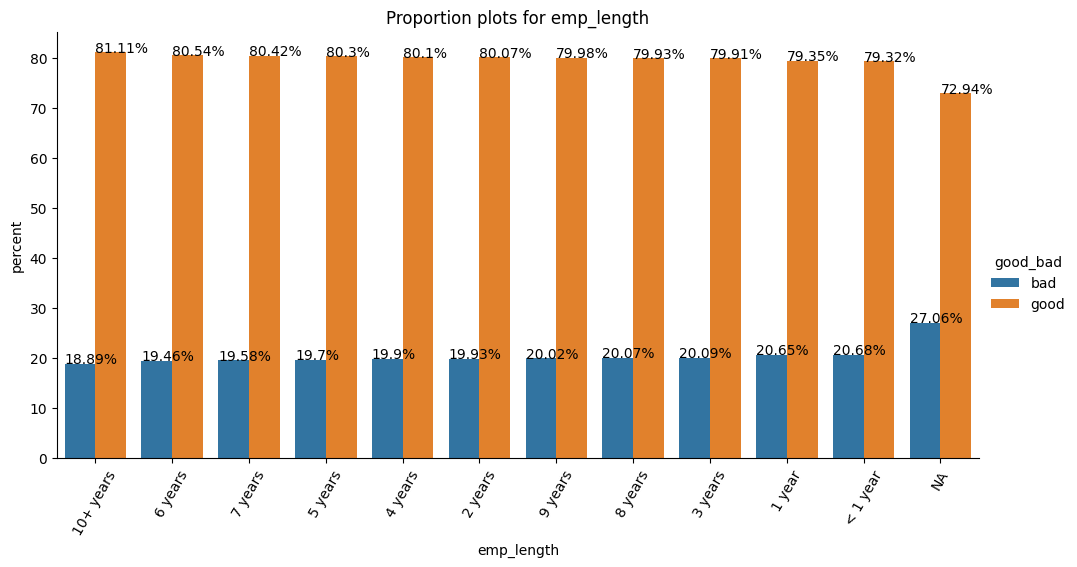

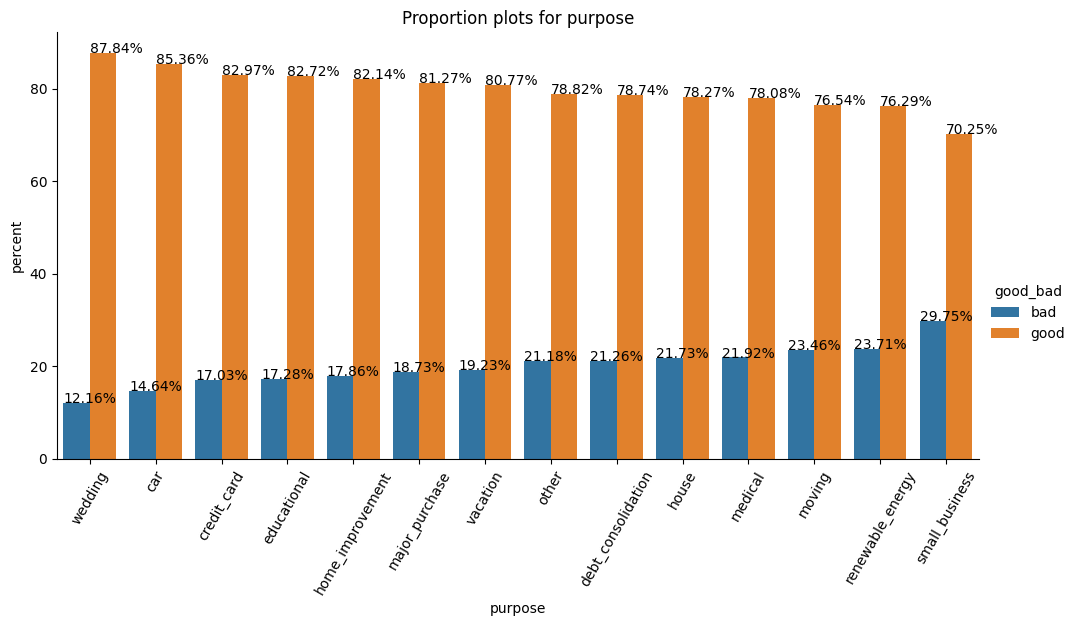

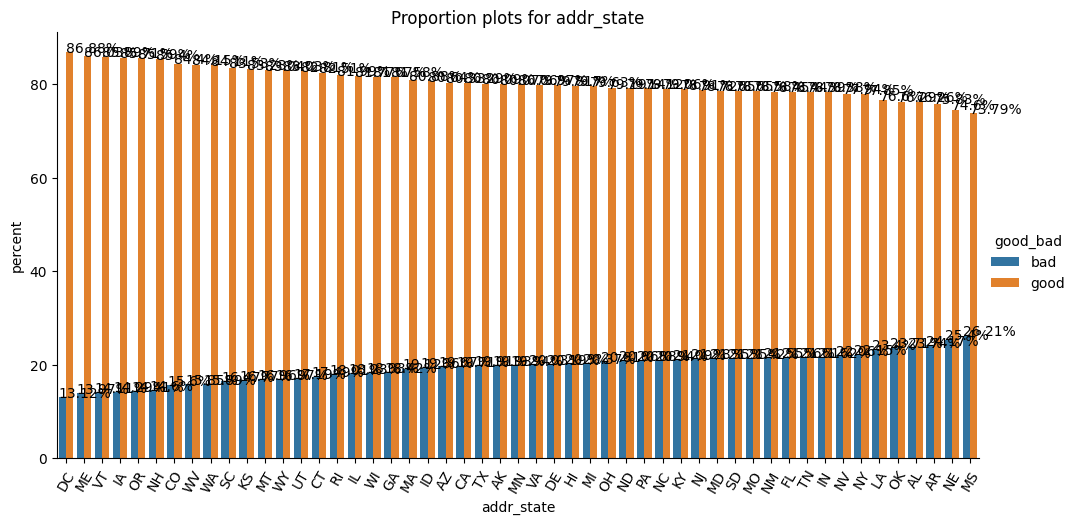

In [ ]:
col_names_three = ['emp_length', 'purpose', 'addr_state']

# graph out proportions of good & bad for desired columns
for col in col_names_three:
    prop = df.groupby(col)['good_bad'].value_counts(normalize=True)

    # convert proportion to percent
    perct = prop*100

    # reset index
    perct_df = perct.reset_index(name = 'percent')

    # sort the values in the two columns
    perct_df_sorted = perct_df.sort_values(['percent'])

    g = sns.catplot(x=col,y='percent',hue='good_bad',kind='bar',
        data=perct_df_sorted, height=5, aspect=2)
    g
    #get text for the bars in the plot
    for p in g.ax.patches[0:(len(g.ax.patches)-2)]:
        txt = str(round(p.get_height(), 2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
    g.set(title = 'Proportion plots for ' + col)
    plt.xticks(rotation = 60)
    plt.show()

* Through these graphs, we can lump each set of the categories below into one new category.
* This is a reasonable approach according to the previous bullet point because, for each category, there are certain stratifications that each subcategory fits into in terms of good and bad proportions. We can lump them together in order to better train our model.
* Using this logic, we will lump together categories as below:

    -  emp_length: maximum 1 year
    -  emp_length: 2-9 years
    -  purpose:  major purchase, vacation
    -  purpose:  educational, home_improvement
    -  purpose:  renewable_energy, moving
    -  purpose:  house, medical
    -  addr_state: ME, VT, IA, OR, NH
    -  addr_state: SC, KS, MT, WY, UT, CT
    -  addr_state: AK, MN, VA, DE, HI, MI
    -  addr_state: ND, PA, NC, KY, NJ, MD, SD, MO, NM, FL, TN, IN

In [ ]:
# Assign 'max 1 year' to those with '< 1 year' or '1 year'
df.loc[df.emp_length.isin(['< 1 year', '1 year']), 'emp_length'] = 'max 1 year'
# Assign '2-9 years' to those that are not '< 1 year', '1 year', '10+ years', or already assigned to 'max 1 year'
df.loc[~df.emp_length.isin(['< 1 year', '1 year', '10+ years', 'max 1 year']), 'emp_length'] = '2-9 years'

# Assign subcategories for purpose based on the stratifications above
df.loc[df.purpose.isin(['major purchase', 'vacation']), 'purpose'] = 'mp_vc'
df.loc[df.purpose.isin(['educational', 'home_improvement']), 'purpose'] = 'ed_hi'
df.loc[df.purpose.isin(['renewable_energy', 'moving']), 'purpose'] = 're_mv'
df.loc[df.purpose.isin(['house', 'medical']), 'purpose'] = 'hs_md'

# Assign subcategories for address state based on the stratifications above
df.loc[df.addr_state.isin(['ME','VT', 'IA', 'OR', 'NH']), 'addr_state'] = 'State Group 1'
df.loc[df.addr_state.isin(['SC','KS', 'MT', 'WY', 'UT', 'CT']), 'addr_state'] = 'State Group 2'
df.loc[df.addr_state.isin(['AK','MN', 'VA', 'DE', 'HI', 'MI']), 'addr_state'] = 'State Group 3'
df.loc[df.addr_state.isin(['ND', 'PA', 'NC', 'KY', 'NJ', 'MD', 'SD', 'MO', 'NM', 'FL', 'TN', 'IN']), 'addr_state'] = 'State Group 4'

#verify by printing out value counts
print(df['emp_length'].value_counts())
print("\n")
print(df['purpose'].value_counts())
print("\n")
print(df['addr_state'].value_counts())

emp_length
2-9 years     684539
10+ years     428547
max 1 year    190200
Name: count, dtype: int64


purpose
debt_consolidation    757424
credit_card           285640
ed_hi                  84786
other                  74905
major_purchase         28325
hs_md                  21982
small_business         15004
car                    14119
re_mv                  10078
mp_vc                   8729
wedding                 2294
Name: count, dtype: int64


addr_state
State Group 4    335420
CA               190994
State Group 3    107530
TX               106639
NY               106375
State Group 2     61733
IL                50023
OH                42429
GA                42021
AZ                31705
MA                29991
CO                28845
WA                28347
State Group 1     26685
NV                19638
WI                17128
AL                16125
LA                15018
OK                11840
AR                 9704
MS                 6314
RI                 5691
WV  

We lump these sets of categories together because they have similar ratios of good versus bad loans in their stratifications. These groupings will help better train the model as it groups together subcategory names that would otherwise be meaningless to the model.

## Methods
## Building Two Models

We will first build an RF model and then the Logistic regression model with LASSO.

### The RF model

* We will build the RF model first in order to see which variables have more predictive power to predict the target variable `good_bad`.
* We will also determine the top 5 and bottom 5 predictors (in terms of variable importance) according to our RF model results.
* Finally, we will show the variable importance graph to support our answer.
  

In [ ]:
df['good'] = df['good_bad'] == 'good'
df['good'].replace([True, False], [1, 0], inplace=True)
y = df['good']

#First, create dummies for the categorical variables
dummies = pd.get_dummies(df.select_dtypes(include=['object', 'category']).drop(['good_bad'], axis = 1))
dummies.info() # check column names and for no missing values

/var/folders/zv/68zhh40n1x97cbggdns4tf1h0000gn/T/ipykernel_2140/3934356057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['good'].replace([True, False], [1, 0], inplace=True)
/var/folders/zv/68zhh40n1x97cbggdns4tf1h0000gn/T/ipykernel_2140/3934356057.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303286 entries, 0 to 1303285
Data columns (total 57 columns):
 #   Column                       Non-Null Count    Dtype
---  ------                       --------------    -----
 0   term_36 months               1303286 non-null  bool 
 1   term_60 months               1303286 non-null  bool 
 2   grade_A                      1303286 non-null  bool 
 3   grade_B                      1303286 non-null  bool 
 4   grade_C                      1303286 non-null  bool 
 5   grade_D                      1303286 non-null  bool 
 6   grade_E                      1303286 non-null  bool 
 7   grade_F                      1303286 non-null  bool 
 8   grade_G                      1303286 non-null  bool 
 9   emp_length_10+ years         1303286 non-null  bool 
 10  emp_length_2-9 years         1303286 non-null  bool 
 11  emp_length_max 1 year        1303286 non-null  bool 
 12  home_ownership_ANY           1303286 non-null  bool 
 13  home_ownersh

In [ ]:
#extract numeric columns for X-df and check
X_numeric = df.select_dtypes(include=['number', 'int64', 'float64']).drop(['good'], axis = 1)
X_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303286 entries, 0 to 1303285
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   funded_amnt     1303286 non-null  int64  
 1   int_rate        1303286 non-null  float64
 2   installment     1303286 non-null  float64
 3   annual_inc      1303286 non-null  float64
 4   dti             1303286 non-null  float64
 5   delinq_2yrs     1303286 non-null  int64  
 6   inq_last_6mths  1303286 non-null  int64  
 7   acc_now_delinq  1303286 non-null  int64  
 8   delinq_amnt     1303286 non-null  int64  
 9   tax_liens       1303286 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 99.4 MB


In [ ]:
# create the continuous numeric part of the X, extract column names
list_numerical = X_numeric.columns
list_numerical

Index(['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'acc_now_delinq', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [ ]:
# Create all features

X = pd.concat([X_numeric, dummies], axis = 1)

# We can verify there are 10 continuous predictors and 7 categorical predictors,
# with the target variable as good_bad. This equates to 18 variables which is our original number.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303286 entries, 0 to 1303285
Data columns (total 67 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   funded_amnt                  1303286 non-null  int64  
 1   int_rate                     1303286 non-null  float64
 2   installment                  1303286 non-null  float64
 3   annual_inc                   1303286 non-null  float64
 4   dti                          1303286 non-null  float64
 5   delinq_2yrs                  1303286 non-null  int64  
 6   inq_last_6mths               1303286 non-null  int64  
 7   acc_now_delinq               1303286 non-null  int64  
 8   delinq_amnt                  1303286 non-null  int64  
 9   tax_liens                    1303286 non-null  int64  
 10  term_36 months               1303286 non-null  bool   
 11  term_60 months               1303286 non-null  bool   
 12  grade_A                      1303286 non-n

In [ ]:
# split data into nontest and test sets
uX_nontest, X_test, uy_nontest, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=2024,
                                                        )
# Applying SMOTE
smote = SMOTE(random_state=2024)
X_nontest, y_nontest = smote.fit_resample(uX_nontest, uy_nontest)

In [ ]:
hyperparameters = {
    'n_estimators': [225],
    'min_samples_split': [2],
    'max_depth': [6],
    'oob_score': [True],  # Keeping out-of-bag score to estimate generalization error
    'n_jobs': [-1],  # Using all processors
    'random_state': [2024],  # For reproducibility
}

In [ ]:
 import time
 start_time = time.time()

 #Random forest classifier
 rf = RandomForestClassifier()

 #Randomized search cross-validation for best hyperparameters
 randomized_search = RandomizedSearchCV(estimator=rf,
                                       param_distributions=hyperparameters,
                                       n_iter=1, # Number of parameter settings that are sampled
                                       cv=5, # folds of the cross-validations
                                       n_jobs = -1,
                                       random_state=2024)
 randomized_search.fit(X_nontest, y_nontest)
print("--- %s seconds ---" % (time.time() - start_time))

# Get the best hyperparameters and fit the model with them
best_hyperparameters = randomized_search.best_params_

# Used code above to find the best hyperparameters.

In [ ]:
best_hyperparameters = {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'random_state': 2024}
best_rf = RandomForestClassifier(**best_hyperparameters)
best_rf.fit(X_nontest, y_nontest)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=2024)

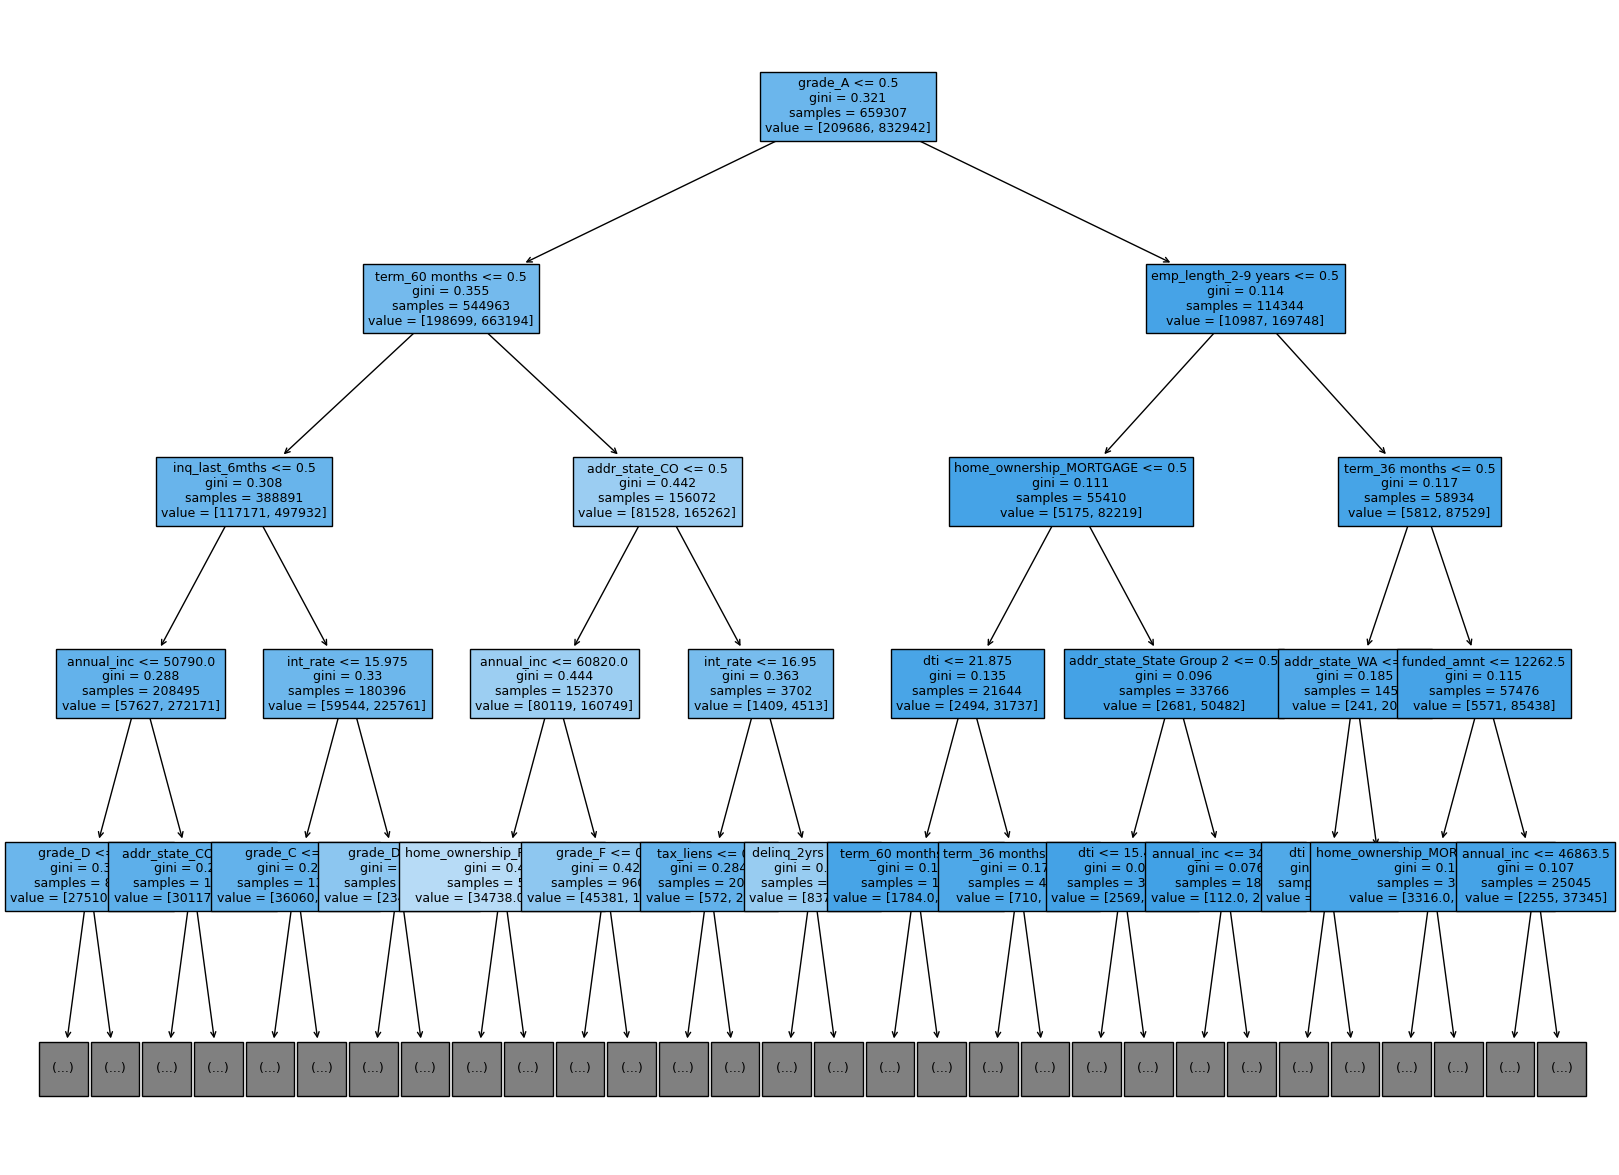

In [ ]:
#show a sample tree from a random forest model
from sklearn.tree import plot_tree
best_estimators = best_rf.estimators_[0]
plt.figure(figsize=(20,15))
plot_tree(best_estimators, filled=True, feature_names = X.columns, max_depth=4, fontsize=9)
plt.show()

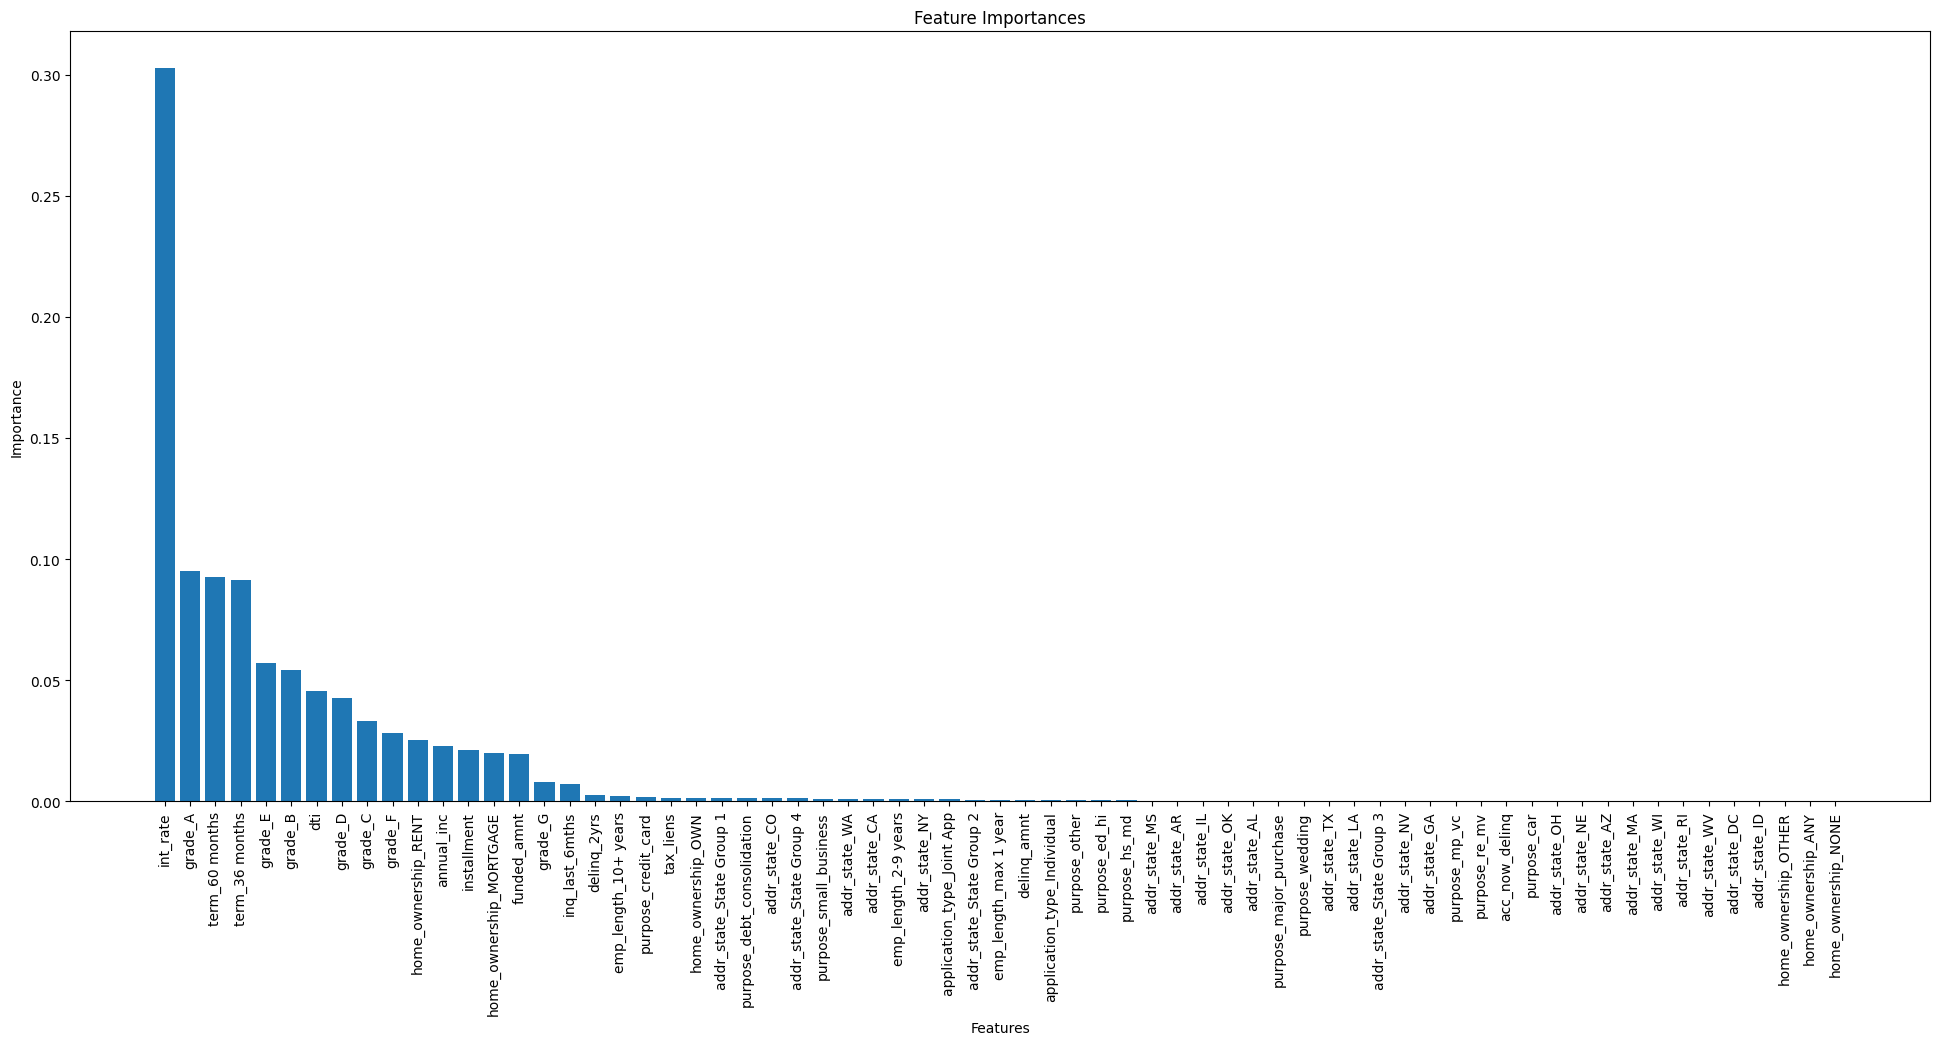

In [ ]:
# importance values
importances = best_rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(24, 10))
plt.bar(range(X.shape[1]), [importances[i] for i in sorted_indices])
plt.xticks(range(X.shape[1]),
           [X.columns[i] for i in sorted_indices],
           rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

From this chart, we can deduce the top 5 and bottom 5 predictors in terms of importance.
Top 5 predictors:
* int_rate
* grade_A
* term_60_months
* term_36_months
* grade_E

Bottom 5 predictors:
* home_ownership_NONE
* home_ownership_OTHER
* home_ownership_ANY
* addr_state_DC
* addr_state_ID

Now, we will report the confusion matrix and estimated accuracy of the model that we chose. Our goal is to reach above 70% accuracy.

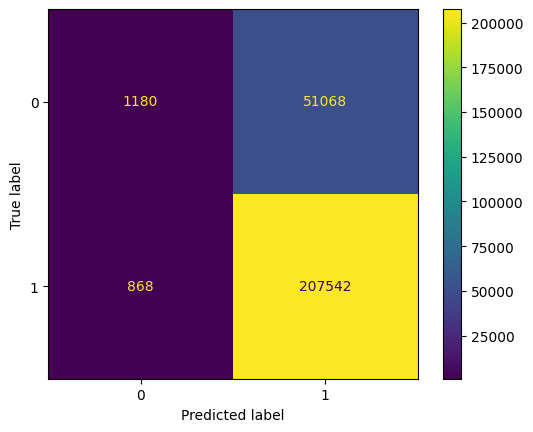

Accuracy: 0.80


In [ ]:
from sklearn.metrics import confusion_matrix
# Predict on the test set, store predictions
y_pred = best_rf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])
cm_display.plot()
plt.show()

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

We have an accuracy of 80%, which fulfills our baseline.

### Logistic regression model with LASSO and cross-validation

Before building the Logistic regression model, we would like to reduce the number of predictors to reduce the computational time.  **We will exclude the following variables in the model**:

* All the variables with important values that is less than 5% of the important value of the most important variable in the RF model.

In [ ]:
factor = 0.05
feat_names = X.columns
min_importance = factor * importances.max()

feat_importance = zip(feat_names, importances)
df_feat_importance = pd.DataFrame(feat_importance, columns=['Features', 'Importances'])
df_feat_relevant = df_feat_importance[df_feat_importance['Importances'] >= min_importance]
relevant_features = df_feat_relevant.Features.tolist()

print(relevant_features)

['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'term_36 months', 'term_60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'home_ownership_MORTGAGE', 'home_ownership_RENT']


*  There are two continuous X-variables that are highly correlated (i.e., the absolute value of the correlation is over 0.9).  Which ones are they?  For the logistic regression model, we keep only one of these two variables--the more "*important*" one according to our RF result.


In [ ]:
corr_matrix = df.select_dtypes(include = 'number').corr()
sorted_pairs = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print(sorted_pairs.head())
print(sorted_pairs.tail())

funded_amnt     funded_amnt    1.000000
                installment    0.954031
annual_inc      funded_amnt    0.310329
                installment    0.301157
inq_last_6mths  int_rate       0.215908
dtype: float64
good        funded_amnt   -0.065265
annual_inc  int_rate      -0.071180
dti         good          -0.087174
            annual_inc    -0.141377
good        int_rate      -0.258454
dtype: float64


The most correlated variable pair is 'funded_amt' and 'installment', which makes sense because the funded amount is the total amount committed to that loan then, while 'installment' is the monthly payment owed by the borrower if the loan originates, so they represent similar quantities. Since funded_amt has a lower importance value than installment, we will remove funded_amt from the model training.

In [ ]:
if ('funded_amnt' in relevant_features):
    relevant_features.remove('funded_amnt')

X = X[relevant_features]
y = df['good']
print(relevant_features)

['int_rate', 'installment', 'annual_inc', 'dti', 'term_36 months', 'term_60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'home_ownership_MORTGAGE', 'home_ownership_RENT']


Now, we will report the area under the ROC curve for the champion model, which should be at least 70% and produce the ROC curve for our champion model.  

In [ ]:
# find out what parameters to use to standardize numeric columns
# of X_nontest by using the data in only nontest
X_nontest, X_test, y_nontest, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=2024,
                                                        stratify = y) # ensure all sets have
                                                        # similar proportion of Y-classes

scaler = StandardScaler().fit(X_nontest)

# transform nontest and test sets with the parameters
X_nontest = scaler.transform(X_nontest)
X_test = scaler.transform(X_test)

In [ ]:
# define the settings of the stratification
cv = StratifiedKFold(n_splits=10, # number of splits
                     random_state=2024, # set seed for the randomization
                     shuffle=True) # shuffle each stratification of the data

# note that cv returns the row indices for the stratification
list(cv.split(X_nontest, y_nontest))

[(array([      0,       2,       3, ..., 1042624, 1042625, 1042627]),
  array([      1,      14,      24, ..., 1042612, 1042617, 1042626])),
 (array([      1,       3,       4, ..., 1042625, 1042626, 1042627]),
  array([      0,       2,      30, ..., 1042595, 1042597, 1042599])),
 (array([      0,       1,       2, ..., 1042625, 1042626, 1042627]),
  array([      4,       8,       9, ..., 1042581, 1042584, 1042611])),
 (array([      0,       1,       2, ..., 1042624, 1042626, 1042627]),
  array([      5,      29,      35, ..., 1042609, 1042615, 1042625])),
 (array([      0,       1,       2, ..., 1042625, 1042626, 1042627]),
  array([     17,      43,      46, ..., 1042569, 1042583, 1042586])),
 (array([      0,       1,       2, ..., 1042625, 1042626, 1042627]),
  array([     13,      19,      33, ..., 1042606, 1042618, 1042620])),
 (array([      0,       1,       2, ..., 1042624, 1042625, 1042626]),
  array([     12,      34,      80, ..., 1042614, 1042623, 1042627])),
 (array([    

In [ ]:
lambdas = np.logspace(-3, 2, num=12)
# specify range of hyperparameters
params = {"C":1/lambdas, "penalty":["l1"]}# l1 lasso

In [ ]:
# using Logistic regression for class imbalance
model = LogisticRegression(class_weight='balanced', solver='saga', penalty="l1", max_iter=5000)

grid_search_cv = GridSearchCV(estimator = model,
                              param_grid = params,
                              scoring= 'roc_auc',
                              cv = 5,
                              return_train_score=True,
                              verbose = 3,
                              n_jobs = -1)

best_model = grid_search_cv.fit(X_nontest, y_nontest)

## reviewing the results
cv_results = pd.DataFrame(grid_search_cv.cv_results_)
cv_results

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.938051,0.196856,0.084561,0.013258,1000.0,l1,"{'C': 1000.0, 'penalty': 'l1'}",0.701484,0.703748,0.701982,...,0.702080,0.001054,2,0.702354,0.701649,0.702094,0.702062,0.702403,0.702112,0.000269
1,26.733505,0.087721,0.071896,0.003148,351.119173,l1,"{'C': 351.1191734215131, 'penalty': 'l1'}",0.701484,0.703748,0.701982,...,0.702080,0.001054,1,0.702354,0.701649,0.702094,0.702062,0.702403,0.702112,0.000269
2,26.865903,0.229222,0.072009,0.005207,123.284674,l1,"{'C': 123.28467394420659, 'penalty': 'l1'}",0.701484,0.703748,0.701982,...,0.702080,0.001054,3,0.702354,0.701649,0.702094,0.702062,0.702403,0.702112,0.000269
3,26.795331,0.263131,0.070626,0.004856,43.287613,l1,"{'C': 43.287612810830595, 'penalty': 'l1'}",0.701484,0.703748,0.701982,...,0.702080,0.001054,4,0.702354,0.701649,0.702094,0.702062,0.702403,0.702112,0.000269
4,33.009449,0.284904,0.073121,0.003335,15.199111,l1,"{'C': 15.199110829529339, 'penalty': 'l1'}",0.701484,0.703748,0.701982,...,0.702080,0.001054,5,0.702354,0.701649,0.702094,0.702062,0.702403,0.702112,0.000269
5,33.166736,0.210909,0.081963,0.008457,5.336699,l1,"{'C': 5.336699231206313, 'penalty': 'l1'}",0.701484,0.703748,0.701982,...,0.702080,0.001054,6,0.702354,0.701649,0.702094,0.702062,0.702403,0.702112,0.000269
6,26.575381,0.056533,0.063562,0.004768,1.873817,l1,"{'C': 1.8738174228603852, 'penalty': 'l1'}",0.701484,0.703748,0.701982,...,0.702080,0.001054,7,0.702354,0.701649,0.702094,0.702062,0.702403,0.702112,0.000269
7,26.521431,0.129715,0.067372,0.009892,0.657933,l1,"{'C': 0.6579332246575682, 'penalty': 'l1'}",0.701483,0.703748,0.701982,...,0.702080,0.001054,8,0.702354,0.701648,0.702094,0.702062,0.702403,0.702112,0.000269
8,25.718497,0.821272,0.069612,0.006862,0.231013,l1,"{'C': 0.23101297000831603, 'penalty': 'l1'}",0.701482,0.703748,0.701983,...,0.702079,0.001055,9,0.702353,0.701648,0.702093,0.702062,0.702402,0.702112,0.000269
9,26.098181,0.514292,0.065249,0.002359,0.081113,l1,"{'C': 0.08111308307896872, 'penalty': 'l1'}",0.701479,0.703747,0.701983,...,0.702077,0.001055,10,0.702352,0.701646,0.702091,0.702060,0.702400,0.702110,0.000269


In [ ]:
# View best hyperparameters
print("Tuned Hyperparameters :", grid_search_cv.best_params_)
auc = round(grid_search_cv.best_score_,4)
print("AUC :",auc)

Tuned Hyperparameters : {'C': 351.1191734215131, 'penalty': 'l1'}
AUC : 0.7021


Our AUC value of 0.7021 successfully exceeds the threshold of 0.70, which represents Area under the ROC Curve. This is a measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

In [ ]:
# double-check that this is the best C by sorting the rows by the `mean_test_score` column and
# extract the top row after sorting
cv_results.sort_values('mean_test_score', ascending = False).iloc[0]

mean_fit_time                                         26.733505
std_fit_time                                           0.087721
mean_score_time                                        0.071896
std_score_time                                         0.003148
param_C                                              351.119173
param_penalty                                                l1
params                {'C': 351.1191734215131, 'penalty': 'l1'}
split0_test_score                                      0.701484
split1_test_score                                      0.703748
split2_test_score                                      0.701982
split3_test_score                                      0.702577
split4_test_score                                      0.700609
mean_test_score                                         0.70208
std_test_score                                         0.001054
rank_test_score                                               1
split0_train_score                      

In [ ]:
s = pd.to_numeric(cv_results['param_C'], errors='coerce')
s

0     1000.000000
1      351.119173
2      123.284674
3       43.287613
4       15.199111
5        5.336699
6        1.873817
7        0.657933
8        0.231013
9        0.081113
10       0.028480
11       0.010000
Name: param_C, dtype: float64

In [ ]:
np.log(1/s)

0    -6.907755
1    -5.861126
2    -4.814496
3    -3.767867
4    -2.721237
5    -1.674607
6    -0.627978
7     0.418652
8     1.465281
9     2.511911
10    3.558541
11    4.605170
Name: param_C, dtype: float64

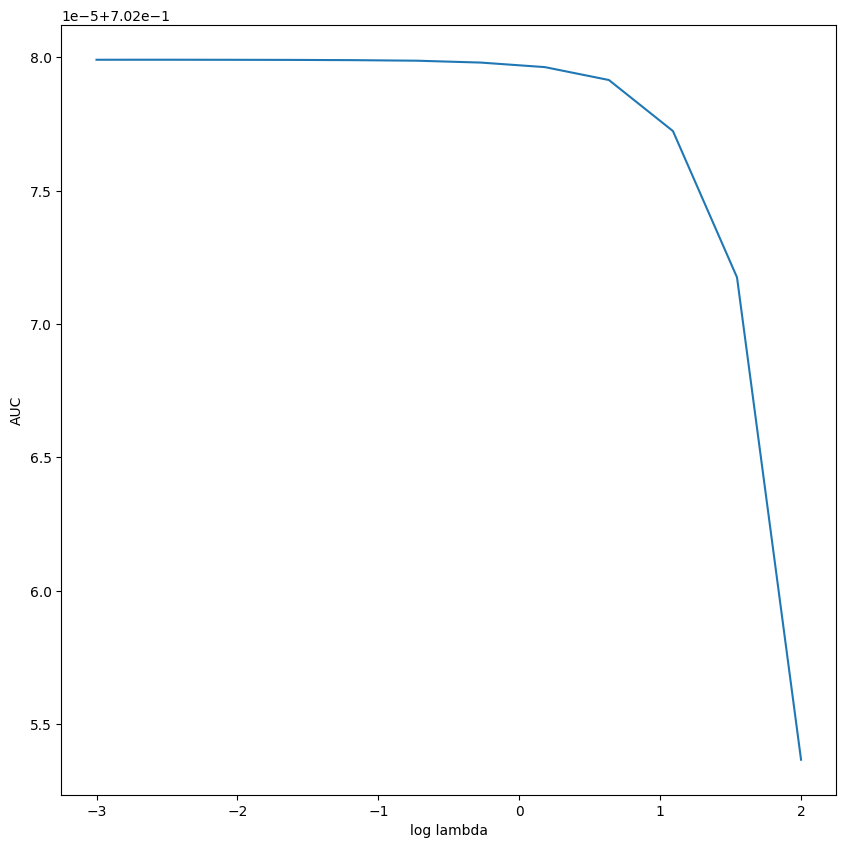

In [ ]:
# Plot AUC for each lambda values
# Although assignment did not ask for this specifically, it helps us see the relationship between lambdas and AUC
plt.figure(figsize=(10,10))
plt.xlabel("log lambda")
plt.ylabel("AUC")
plt.plot(np.log10(1/s),cv_results['mean_test_score'])
plt.show()

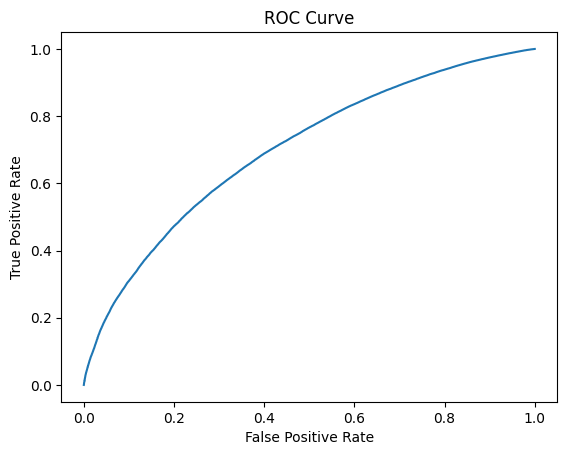

[CV 1/5] END C=351.1191734215131, penalty=l1;, score=(train=0.702, test=0.701) total time=  26.8s
[CV 3/5] END C=123.28467394420659, penalty=l1;, score=(train=0.702, test=0.702) total time=  26.8s
[CV 3/5] END C=15.199110829529339, penalty=l1;, score=(train=0.702, test=0.702) total time=  33.4s
[CV 5/5] END C=1.8738174228603852, penalty=l1;, score=(train=0.702, test=0.701) total time=  26.6s
[CV 4/5] END C=0.23101297000831603, penalty=l1;, score=(train=0.702, test=0.703) total time=  24.7s
[CV 1/5] END C=0.02848035868435805, penalty=l1;, score=(train=0.702, test=0.701) total time=  14.7s
[CV 3/5] END C=351.1191734215131, penalty=l1;, score=(train=0.702, test=0.702) total time=  26.7s
[CV 2/5] END C=123.28467394420659, penalty=l1;, score=(train=0.702, test=0.704) total time=  26.8s
[CV 2/5] END C=15.199110829529339, penalty=l1;, score=(train=0.702, test=0.704) total time=  33.1s
[CV 2/5] END C=1.8738174228603852, penalty=l1;, score=(train=0.702, test=0.704) total time=  26.7s
[CV 2/5] E

In [ ]:
from sklearn.metrics import roc_curve
y_pred = best_model.predict_proba(X_test)[:, 1]
# plot the ROC Curve for model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

From this graph, we can deduce that to identify 75% of the bad accounts, which are TPR, we should have a model that misclassifies about 50% of good accounts, which are FPR.

## Conclusion
### Discussion

* A dataset that is severely imbalanced for the classes of the dependent variable could result in poor performance of the model because the model could be trained in a way where there is a lot of bias to the majority class, and this would ultimately result in the model being bad at generalizing to new test data, as it has limited information on the minority class.
* The main difference between Bagging (Bootstrap Aggregating) and Random Forest (RF) is that while both use bootstrapping to create multiple datasets for training multiple models, Random Forest introduces an additional layer of randomness by selecting a random subset of features for splitting nodes in decision trees. Bagging can be applied to various models, but Random Forest specifically applies bagging to decision trees and enhances diversity among the trees with this feature selection method. Bagging, on the other hand, uses all features.
* There are a few situations where logistic regression outperforms RF. When there is a small number of observations, an approximately linear relationship between independent and dependent variables, and when the data is not complex, LR will likely be better. Also, logistic regression can often outperform Random Forest if the true underlying relationship between the predictive and response variables is linear. It favors less complex linear datasets. When there exists a hyperplane/linear divider that can perfectly separate all data points in the feature space into two classes, logistic regression can be better. This is because small datasets allow LR to be more interpretable and faster to train when the data does not have complex relationships.
* False, this low importance value means that for the variable 'addr_state_WV', our model predicting good & bad loans indicates that the model finds this variable to have a small impact on the prediction of loan performance. It does NOT mean that  people living in West Virginia necessarily have a low chance of having bad credit. This is because variable importance is indicative of the variable's influence on model predictions as a whole. It doesn't indicate a direction of correlation.